# Image visualization

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from aiida import orm, engine, plugins
import aiida
aiida.load_profile();

FITSDATA = plugins.DataFactory('fits.data')
ArrayData = plugins.DataFactory('core.array')

### Search and load FITS data

In [26]:
qb = orm.QueryBuilder()
qb.append(FITSDATA, project=["*"])
#qb.all()

QueryBuilder(path=[{'entity_type': 'data.fits.data.FitsData.', 'orm_base': 'node', 'tag': 'FitsData_1', 'joining_keyword': None, 'joining_value': None, 'edge_tag': None, 'outerjoin': False}], filters={'FitsData_1': {'node_type': {'like': 'data.fits.data.%'}}}, project={'FitsData_1': [{'*': {}}]}, project_map={}, order_by=[], limit=None, offset=None, distinct=False)

Min: 2192.0
Max: 2320.0
Mean: 2239.2006562405713
Stdev: 3.2491795004480712
{'GAIN': 0, 'EXPTIME': 3.2e-05, 'DATE-OBS': '2026-02-27T13:24:29.502', 'INSTRUME': 'ZWO ASI224MC'}


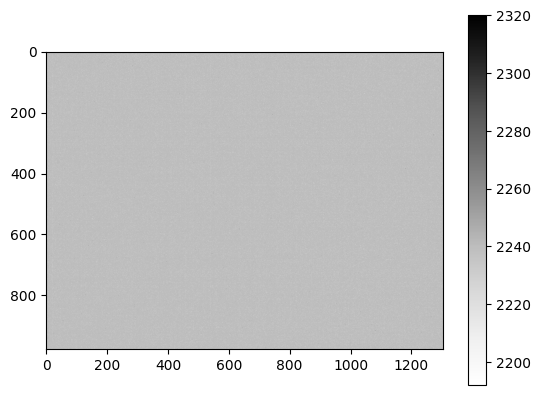

In [28]:
PK_NUMBER = 327

node = orm.load_node(PK_NUMBER)
with node.open(mode='rb') as handle:
    hdul = fits.open(handle)
    image_data = hdul[0].data
    
    plt.imshow(image_data, cmap='Greys',vmin=np.min(image_data), vmax=np.max(image_data))
    plt.colorbar();
    print('Min:', np.min(image_data))
    print('Max:', np.max(image_data))
    print('Mean:', np.mean(image_data))
    print('Stdev:', np.std(image_data))
    print(node.header)
    

### Inspecting qtables

In [2]:
qb = orm.QueryBuilder()
qb.append(ArrayData, project=["*"])
qb.all()

[[<ArrayData: uuid: 142e5384-711e-41df-90e7-4761a6336cc7 (pk: 1)>],
 [<ArrayData: uuid: 31a62d66-c249-49c3-b761-5c905e9e394e (pk: 648)>],
 [<ArrayData: uuid: d3d66c19-a0ec-460d-851b-f5334e368530 (pk: 650)>]]

In [3]:
node = orm.load_node(648)
node

<ArrayData: uuid: 31a62d66-c249-49c3-b761-5c905e9e394e (pk: 648)>

In [4]:
node.get_arraynames()

['as_array']

In [5]:
node.get_array('as_array')

array([(1, 10., 10., 56443.97506204, 100341.53803436)],
      dtype=[('id', '<i8'), ('xcenter', '<f8'), ('ycenter', '<f8'), ('aperture_sum_0', '<f8'), ('aperture_sum_1', '<f8')])

In [26]:
node = orm.List([3])

In [27]:
node

<List: uuid: 0ac7575e-8630-4408-abc5-6ac4684d6544 (unstored) value: [3]>

In [31]:
node.attributes['list']

[3]